# 1 卷积与池化

# 1.1 torch.nn.Conv2d形状参数

In [9]:
import torch

in_channels, out_channels, kernel_size = 5, 10, 3
width, height = 100, 100
batch_size = 1

input = torch.randn(batch_size, in_channels, width, height)  #输入数据,1*5*100*100,随机数,均值为0,方差为1,正态分布
conv = torch.nn.Conv2d(in_channels, out_channels, kernel_size)  #卷积层,输入通道数5,输出通道数10,卷积核大小3*3
output = conv(input)  #进行卷积运算
print(input.shape)
print(output.shape)
print(conv.weight.shape)  #10个卷积核，每个卷积核的形状为5*3*3

torch.Size([1, 5, 100, 100])
torch.Size([1, 10, 98, 98])
torch.Size([10, 5, 3, 3])


## 1.2 填充：padding

通过设置参数padding=1（即在输入数据外填充1圈0），使输出的结果为1 * 1 * 5 * 5,与输入的形状一致

In [19]:
import torch

input = [3, 4, 6, 5, 7,
         2, 4, 6, 8, 2,
         1, 6, 7, 8, 4,
         9, 7, 4, 6, 2,
         3, 7, 5, 4, 1]
input = torch.tensor(input, dtype=torch.float).view(1, 1, 5, 5)
conv_layer = torch.nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)  #padding=1,卷积核大小3*3,输入通道数1,输出通道数1
kernel = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.float).view(1, 1, 3, 3)
conv_layer.weight.data = kernel.data  #卷积核的值

output = conv_layer(input)
print(output)

tensor([[[[ 91., 168., 224., 215., 127.],
          [114., 211., 295., 262., 149.],
          [192., 259., 282., 214., 122.],
          [194., 251., 253., 169.,  86.],
          [ 96., 112., 110.,  68.,  31.]]]], grad_fn=<ConvolutionBackward0>)


## 1.3 步长：stride


In [20]:
import torch

input = [3, 4, 6, 5, 7,
         2, 4, 6, 8, 2,
         1, 6, 7, 8, 4,
         9, 7, 4, 6, 2,
         3, 7, 5, 4, 1]
input = torch.tensor(input, dtype=torch.float).view(1, 1, 5, 5)
conv_layer = torch.nn.Conv2d(1, 1, kernel_size=3, stride=2, bias=False)  #stride=2,卷积核大小3*3,输入通道数1,输出通道数1
kernel = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.float).view(1, 1, 3, 3)
conv_layer.weight.data = kernel.data  #卷积核的值

output = conv_layer(input)
print(output)

tensor([[[[211., 262.],
          [251., 169.]]]], grad_fn=<ConvolutionBackward0>)


# 2 池化层

In [23]:
import torch

input = [3, 4, 6, 5,
         2, 4, 6, 8,
         1, 6, 7, 5,
         9, 7, 4, 6]
input = torch.tensor(input, dtype=torch.float).view(1, 1, 4, 4)
maxpooling_layer = torch.nn.MaxPool2d(kernel_size=2)  #池化层,池化核大小2*2,步长默认为池化核大小
output = maxpooling_layer(input)
print(output)

tensor([[[[4., 8.],
          [9., 7.]]]])


# 3 手写数字识别

[1,   300] loss: 0.577
[1,   600] loss: 0.192
[1,   900] loss: 0.127
Accuracy on test set: 97 %
[2,   300] loss: 0.113
[2,   600] loss: 0.094
[2,   900] loss: 0.087
Accuracy on test set: 97 %
[3,   300] loss: 0.084
[3,   600] loss: 0.077
[3,   900] loss: 0.068
Accuracy on test set: 97 %
[4,   300] loss: 0.066
[4,   600] loss: 0.062
[4,   900] loss: 0.061
Accuracy on test set: 98 %
[5,   300] loss: 0.052
[5,   600] loss: 0.055
[5,   900] loss: 0.057
Accuracy on test set: 98 %
[6,   300] loss: 0.050
[6,   600] loss: 0.051
[6,   900] loss: 0.048
Accuracy on test set: 98 %
[7,   300] loss: 0.045
[7,   600] loss: 0.046
[7,   900] loss: 0.045
Accuracy on test set: 98 %
[8,   300] loss: 0.040
[8,   600] loss: 0.043
[8,   900] loss: 0.042
Accuracy on test set: 98 %
[9,   300] loss: 0.035
[9,   600] loss: 0.041
[9,   900] loss: 0.040
Accuracy on test set: 98 %
[10,   300] loss: 0.038
[10,   600] loss: 0.033
[10,   900] loss: 0.038
Accuracy on test set: 98 %


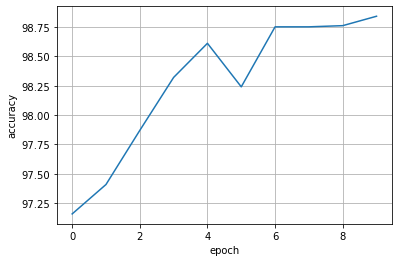

In [24]:
import torch
import torch.nn.functional as F
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1、准备数据集
batch_size = 64
transform = transforms.Compose([  # 一系列的操作，Compose将其组合在一起
    transforms.ToTensor(),  # 将图片转换为Tensor
    transforms.Normalize((0.1307,), (0.3081,))  # 标准化到[0,1]，均值和方差
])
train_dataset = datasets.MNIST(root='../P6 逻辑斯谛回归/data',
                               train=True,
                               download=False,  # 在P6 逻辑斯谛回归中我已下载，这里直接读取即可
                               transform=transform)
test_dataset = datasets.MNIST(root='../P6 逻辑斯谛回归/data',
                              train=False,
                              download=False,
                              transform=transform)
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=False)  # 测试集设置为False，方便观察结果


# 2、设计模型
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 10, kernel_size=5)  # 第一个卷积层
        self.conv2 = torch.nn.Conv2d(10, 20, kernel_size=5)  # 第二个卷积层
        self.mp = torch.nn.MaxPool2d(2)  # 池化层
        self.l1 = torch.nn.Linear(320, 10)  # 全连接层

    def forward(self, x):
        # Flatten data from (n, 1, 28, 28) to (n, 784)
        batch_size = x.size(0)  #获取batch_size,这里的batch_size=64
        x = F.relu(self.mp(self.conv1(x)))  # 第一个卷积层+池化层+激活函数
        x = F.relu(self.mp(self.conv2(x)))  # 第二个卷积层+池化层+激活函数
        x = x.view(batch_size, -1)  # 将数据展平，方便全连接层处理
        x = self.l1(x)  # 全连接层
        return x


model = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # 判断是否有GPU加速
model.to(device)  # 将模型放到GPU上

# 3、构建损失和优化器
criterion = torch.nn.CrossEntropyLoss()  # 交叉熵损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)  # 优化器,lr为学习率，momentum为动量


# 4、训练和测试
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # 将数据放到GPU上
        optimizer.zero_grad()  # 梯度清零
        # forward + backward + update
        outputs = model(inputs)  # outputs并不是概率，而是线性层的输出，但其大小顺序与概率分布相同
        loss = criterion(outputs, labels)
        loss.backward()  # 反向传播
        optimizer.step()  # 更新参数

        running_loss += loss.item()
        if batch_idx % 300 == 299:  # 每300个batch打印一次平均loss
            print('[%d, %5d] loss: %.3f' % (epoch + 1, batch_idx + 1, running_loss / 300))
            running_loss = 0.0


def test():
    correct = 0
    total = 0
    with torch.no_grad():  # 测试过程中不需要计算梯度
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)  # 将数据放到GPU上
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)  # 返回每一行中最大值的那个元素，以及其索引
            total += labels.size(0)  # labels的size为[64]，即64个样本
            correct += (predicted == labels).sum().item()  # 统计预测正确的样本个数
    accuracy = 100 * correct / total
    accuracy_list.append(accuracy)
    print('Accuracy on test set: %d %%' % accuracy)


if __name__ == '__main__':
    accuracy_list = []
    for epoch in range(10):
        train(epoch)
        test()
    plt.plot(accuracy_list)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.show()